# Table of Contents
 <p><div class="lev1 toc-item"><a href="#OSMI-Mental-Health-In-Tech-Survey-2016-:-Inference-on-Cluster-Analysis" data-toc-modified-id="OSMI-Mental-Health-In-Tech-Survey-2016-:-Inference-on-Cluster-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>OSMI Mental Health In Tech Survey 2016 : Inference on Cluster Analysis</a></div><div class="lev1 toc-item"><a href="#Recap" data-toc-modified-id="Recap-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Recap</a></div><div class="lev1 toc-item"><a href="#Model-Study" data-toc-modified-id="Model-Study-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Study</a></div><div class="lev2 toc-item"><a href="#Class-Descriptions" data-toc-modified-id="Class-Descriptions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Class Descriptions</a></div><div class="lev1 toc-item"><a href="#Relationship-of-Clusters-with-Demographics" data-toc-modified-id="Relationship-of-Clusters-with-Demographics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Relationship of Clusters with Demographics</a></div><div class="lev2 toc-item"><a href="#Simple-Modeling" data-toc-modified-id="Simple-Modeling-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Simple Modeling</a></div><div class="lev2 toc-item"><a href="#Inference-and-Preditions" data-toc-modified-id="Inference-and-Preditions-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Inference and Preditions</a></div>

# OSMI Mental Health In Tech Survey 2016 : Inference on Cluster Analysis

_By [Michael Rosenberg](mmrosenb@andrew.cmu.edu)._

In [226]:
#imports
library(poLCA)
library(nnet)
library(tree)

#constants
sigLev = 3
percentMul = 100
options(warn=-1)

In [227]:
#load in data
inferenceFrame = read.csv("../../data/processed/clusterData_inference.csv")
finalMod.lcm = readRDS("../../models/finalClusterModel.rds")

# Recap

# Model Study

In [228]:
priorFrame = data.frame(class = c("Class 1","Class 2","Class 3"),
                        prior = signif(finalMod.lcm$P,sigLev))
priorFrame

class,prior
Class 1,0.279
Class 2,0.291
Class 3,0.430


_Table 1: Our prior distribution over our classes._

We see that Class $3$ is more frequent than the other two, and Class $2$ is the least frequent of the three in our estimates. That being said, these classes are extremely close together, which suggests that we have relatively balanced classes.

In [229]:
displayTable <- function(givenMod,varName){
    #helper for producing table
    #first, get discrete encoding
    dEncodeFilename = paste0("../../data/preprocessed/discreteEncodings/",
                             varName,".csv")
    dEncodeFrame = read.csv(dEncodeFilename)
    #get levels
    dEncodeLevels = dEncodeFrame$level
    givenModTable = givenMod$probs[[varName]]
    colnames(givenModTable) = dEncodeLevels
    #then export
    return(givenModTable)
}

In [230]:
finalMod.lcm$probs

$empPrimTech
              Pr(1)     Pr(2)
class 1:  0.8244730 0.1755270
class 2:  0.7556236 0.2443764
class 3:  0.7313169 0.2686831

$empProvideMHB
               Pr(1)      Pr(2)     Pr(3)     Pr(4)
class 1:  0.07427009 0.22916795 0.2261028 0.4704592
class 2:  0.06018964 0.06937303 0.7134120 0.1570253
class 3:  0.07747540 0.23044875 0.4827873 0.2092886

$knowMHB
               Pr(1)      Pr(2)     Pr(3)     Pr(4)
class 1:  0.14796891 0.09327078 0.3717736 0.3869867
class 2:  0.10042556 0.48110518 0.2825578 0.1359115
class 3:  0.09981376 0.25939416 0.2615314 0.3792607

$empDiscMH
              Pr(1)      Pr(2)      Pr(3)
class 1:  0.8394722 0.04933336 0.11119440
class 2:  0.4473752 0.46926465 0.08336010
class 3:  0.8245459 0.12139603 0.05405804

$empResourceMH
              Pr(1)      Pr(2)     Pr(3)
class 1:  0.5476726 0.03033633 0.4219911
class 2:  0.2529474 0.56581158 0.1812410
class 3:  0.5285850 0.20643733 0.2649777

$anonProtected
              Pr(1)     Pr(2)        Pr(3)
class 1:  0.8649082 0.0791176 5.597423e-02
class 2:  0.3787851 0.6212149 4.869347e-66
class 3:  0.7042347 0.1778710 1.178943e-01

$askLeaveDiff
               Pr(1)     Pr(2)     Pr(3)         Pr(4)      Pr(5)      Pr(6)
class 1:  0.20759913 0.2659001 0.2399045  2.774653e-11 0.12242258 0.16417369
class 2:  0.40340612 0.3395392 0.1364857 7.443782e-313 0.07548902 0.04507992
class 3:  0.05098043 0.1496780 0.1537241  2.191933e-01 0.27128340 0.15514075

$negConsDiscMH
               Pr(1)     Pr(2)        Pr(3)
class 1:  0.55936678 0.4406332 4.360700e-68
class 2:  0.78683503 0.2063713 6.793659e-03
class 3:  0.01372454 0.5362477 4.500278e-01

$negConsDiscPH
              Pr(1)      Pr(2)      Pr(3)
class 1:  0.9015073 0.09849273 0.00000000
class 2:  0.9087820 0.09121797 0.00000000
class 3:  0.4762074 0.44260986 0.08118272

$coworkComfMHD
              Pr(1)      Pr(2)      Pr(3)
class 1:  0.5850546 0.23937312 0.17557232
class 2:  0.4416065 0.51536516 0.04302838
class 3:  0.3401605 0.05609075 0.60374879

$superComfMHD
               Pr(1)     Pr(2)       Pr(3)
class 1:  0.35724820 0.5306085 0.112143335
class 2:  0.87569818 0.1174421 0.006859767
class 3:  0.08894139 0.3512466 0.559811971

$empSeriousMH
              Pr(1)     Pr(2)     Pr(3)
class 1:  0.6435654 0.2152881 0.1411465
class 2:  0.1913052 0.6759570 0.1327377
class 3:  0.4511753 0.1011147 0.4477100

$heardNegConsMH
              Pr(1)      Pr(2)
class 1:  0.9877511 0.01224893
class 2:  0.9520863 0.04791371
class 3:  0.8495859 0.15041405

$discInterviewPH
              Pr(1)     Pr(2)     Pr(3)
class 1:  0.5228792 0.2932307 0.1838901
class 2:  0.4078881 0.3292150 0.2628970
class 3:  0.3668165 0.1510890 0.4820945

$discInterviewMH
              Pr(1)     Pr(2)     Pr(3)
class 1:  0.4067476 0.4893513 0.1039010
class 2:  0.4208812 0.4305374 0.1485814
class 3:  0.1208965 0.8563080 0.0227955

$hurtCareerMH
              Pr(1)        Pr(2)     Pr(3)         Pr(4)      Pr(5)
class 1:  0.6680637 1.239090e-01 0.1814641  1.199368e-02 0.01456951
class 2:  0.5004982 2.530836e-01 0.1136515  8.449795e-02 0.04826868
class 3:  0.1571125 2.624015e-98 0.7145163 3.734120e-178 0.12837115

$teamNegMH
               Pr(1)     Pr(2)      Pr(3)      Pr(4)       Pr(5)
class 1:  0.38829324 0.5330610 0.01183862 0.05109429 0.015712897
class 2:  0.44312437 0.3622803 0.01246846 0.05322270 0.128904187
class 3:  0.06912633 0.3058124 0.04476435 0.57621775 0.004079122

$observeBadResponseMH
              Pr(1)     Pr(2)      Pr(3)     Pr(4)      Pr(5)
class 1:  0.5759585 0.2287329 0.02023198 0.1234917 0.05158498
class 2:  0.4909702 0.1950338 0.14048537 0.1499544 0.02355625
class 3:  0.2842630 0.2918597 0.18003059 0.1999229 0.04392381

We see interesting results from the following tables:

* ```empProvideMHB```

* ```knowMHB```

* ```empDiscMH```

* ```anonProtected```

* ```askLeaveDiff```

* ```negConsDiscMH```

* ```negConsDiscPH```

* ```coworkComfMHD```

* ```superComfMHD```

* ```discInterviewMH```

* ```hurtCareerMH```

* ```teamNegMH```

* ```observeBadResponseMH```

In [231]:
displayTable(finalMod.lcm,"empProvideMHB")

,Not eligible for coverage / N/A,No,Yes,I don't know
class 1:,0.07427009,0.22916795,0.2261028,0.4704592
class 2:,0.06018964,0.06937303,0.7134120,0.1570253
class 3:,0.07747540,0.23044875,0.4827873,0.2092886


_Table 2: Conditional Probabilities on Answers to the question "Does your employer provide mental health benefits as part of healthcare coverage?" ._

We see a start effect beginning to occur in these classes. It is apparent that Class $2$ has a higher chance of having mental health coverage than classes $1$ and $3$. However, For Class $1$, this is because of an uncertainty about available coverage ("I don't know"), while this is more evenly distributed across outcomes for class $3$. This to some extent suggests that we have a class that has good coverage, and two classes that either primarily don't or are uncertain about available coverage.

In [232]:
displayTable(finalMod.lcm,"knowMHB")

,N/A,Yes,I am not sure,No
class 1:,0.14796891,0.09327078,0.3717736,0.3869867
class 2:,0.10042556,0.48110518,0.2825578,0.1359115
class 3:,0.09981376,0.25939416,0.2615314,0.3792607


_Table 3: Conditional Probabilities on Answers to the question "Do you know the options for mental health care available under your employer-provided coverage?" ._

We see an emphasis on "I am not sure" and "No" for class $1$, an emphasis on "Yes" and "I am not sure" for class $2$, and a balanced class for class $3$. This suggests that class $1$ leans no on this question, class $2$ leans yes on this question, and class $3$ is generally uncertain on its lean for this question.

In [233]:
displayTable(finalMod.lcm,"empDiscMH")

,No,Yes,I don't know
class 1:,0.8394722,0.04933336,0.11119440
class 2:,0.4473752,0.46926465,0.08336010
class 3:,0.8245459,0.12139603,0.05405804


_Table 4: Conditional Probabilities on Answers to the question "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?" ._

We see that Class $1$ and Class $3$ seem to be centered on No, while class $2$ is balanced between no and yes. Thus, Class $1$ and $3$ represent a likelihood of an employer not discussing mental health, while class $2$ represents a toss-up between the two possibilities.

In [234]:
displayTable(finalMod.lcm,"anonProtected")

,I don't know,Yes,No
class 1:,0.8649082,0.0791176,5.597423e-02
class 2:,0.3787851,0.6212149,4.869347e-66
class 3:,0.7042347,0.1778710,1.178943e-01


_Table 5: Conditional Probabilities on answers to the question "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?" ._

We see that Class $1$ and $3$ represent a high uncertainty that their anonymity is protected, while Class $2$ leans yes on this. Thus, class $2$ represents individuals who are more sure that their anonymity will be protected if they take advantage of mental health and substance abuse treatment resources.

In [235]:
displayTable(finalMod.lcm,"askLeaveDiff")

,Very easy,Somewhat easy,Neither easy nor difficult,Very difficult,Somewhat difficult,I don't know
class 1:,0.20759913,0.2659001,0.2399045,2.774653e-11,0.12242258,0.16417369
class 2:,0.40340612,0.3395392,0.1364857,7.443782e-313,0.07548902,0.04507992
class 3:,0.05098043,0.1496780,0.1537241,2.191933e-01,0.27128340,0.15514075


_Table 6: "If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:"_

We see that class $1$ and $2$ generally features individuals who would suggest that asking for leave for mental health reasons would be easy, while Class $3$ represents individuals who would find that process more difficult.

In [236]:
displayTable(finalMod.lcm,"negConsDiscMH")

,No,Maybe,Yes
class 1:,0.55936678,0.4406332,4.360700e-68
class 2:,0.78683503,0.2063713,6.793659e-03
class 3:,0.01372454,0.5362477,4.500278e-01


_Table 7: "Do you think that discussing a mental health disorder with your employer would have negative consequences?" ._

Classes $1$ and $2$ generally feature indivduals who find the process of discussing mental health with their employer to not feature negative consequences, while Class $3$ suggests that there might be negative consequences to this process.

In [237]:
displayTable(finalMod.lcm,"negConsDiscPH")

,No,Maybe,Yes
class 1:,0.9015073,0.09849273,0.00000000
class 2:,0.9087820,0.09121797,0.00000000
class 3:,0.4762074,0.44260986,0.08118272


_Table 8: "Do you think that discussing a physical health issue with your employer would have negative consequences?" ._

Interestingly, Classes $1$ and $2$ seem to also find that discussing mental health will not feature negative consequences, while Class 3 leans maybe-to-no on this context. Thus, Classes $1$ and $2$ seem rather certain that they will not feature negative consequences on either discussions of mental and physical health, while Class $3$ leans yes for mental health and leans no for physical health. In particular, what becomes rather interesting is that Classes $1$ and $2$ seem to be much more certain that they will not face negative consequences in the physical health ream than they are in the mental health realm.

In [238]:
displayTable(finalMod.lcm,"coworkComfMHD")

,Maybe,Yes,No
class 1:,0.5850546,0.23937312,0.17557232
class 2:,0.4416065,0.51536516,0.04302838
class 3:,0.3401605,0.05609075,0.60374879


_Table 9: "Would you feel comfortable discussing a mental health disorder with your coworkers?" _

What becomes clear is the effect on the no answer. We see that there is a higher emphasis on "No" progressing from classes $2$, $1$, $3.$ This may suggest that Class $2$ features those who are very likely to be uncomfortable discussing with their coworkers, Class $1$ features individuals who are somewhat likely to be uncomfortable discussing with their coworkers, and Class $3$ features individuals who are not very likely to be uncomfortable discussing with their coworkers.

In [239]:
displayTable(finalMod.lcm,"superComfMHD")

,Yes,Maybe,No
class 1:,0.35724820,0.5306085,0.112143335
class 2:,0.87569818,0.1174421,0.006859767
class 3:,0.08894139,0.3512466,0.559811971


_Table 10: "Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?" ._

We see a similar progression from our previous table. Thus, it is likely that those who are comfortable discussing mental health with their coworkers are likely to be comfortable discussing mental health with their direct supervisors.

In [240]:
displayTable(finalMod.lcm,"discInterviewMH")

,Maybe,No,Yes
class 1:,0.4067476,0.4893513,0.1039010
class 2:,0.4208812,0.4305374,0.1485814
class 3:,0.1208965,0.8563080,0.0227955


_Table 11: "Would you bring up a mental health issue with a potential employer in an interview?" ._

We see another thing occur: Class $3$ will very not likely discuss a mental health issue with a potential employer, and there seems to be more comfort in class $2$ and $1$. We see generally that most people do not say yes to this question, expressing a lean no across all classes.

In [241]:
displayTable(finalMod.lcm,"hurtCareerMH")

,Maybe,"No, I don't think it would","Yes, I think it would","No, it has not","Yes, it has"
class 1:,0.6680637,1.239090e-01,0.1814641,1.199368e-02,0.01456951
class 2:,0.5004982,2.530836e-01,0.1136515,8.449795e-02,0.04826868
class 3:,0.1571125,2.624015e-98,0.7145163,3.734120e-178,0.12837115


_Table 12: "Do you feel that being identified as a person with a mental health issue would hurt your career?"._

We see the key impact is between the the "Yes, I think it would" column and the "Maybe" column. We see that Class $3$ tends to believe for sure that being identified as a person with a mental health issue will in fact hurt their career, while Classes $1$ and $2$ believe that being identified will only maybe hurt their career. This is again identifying a sense of certainty and uncertainty that exist among the three classes.

In [242]:
displayTable(finalMod.lcm,"teamNegMH")

,"No, I don't think they would",Maybe,"Yes, they do","Yes, I think they would","No, they do not"
class 1:,0.38829324,0.5330610,0.01183862,0.05109429,0.015712897
class 2:,0.44312437,0.3622803,0.01246846,0.05322270,0.128904187
class 3:,0.06912633,0.3058124,0.04476435,0.57621775,0.004079122


_Table 13: "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?" ._

We see a that Class $3$ leans yes in this situation while classes $1$ and $2$ lean no in this situation. This is very similar to our previous question, although there is a deeper "lean no" in this context.

In [243]:
displayTable(finalMod.lcm,"observeBadResponseMH")

,No,Maybe/Not sure,"Yes, I experienced","Yes, I observed",N/A
class 1:,0.5759585,0.2287329,0.02023198,0.1234917,0.05158498
class 2:,0.4909702,0.1950338,0.14048537,0.1499544,0.02355625
class 3:,0.2842630,0.2918597,0.18003059,0.1999229,0.04392381


_Table 14: "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?" ._

The key changes we see are in the No and Maybe columns. Class $1$ leans no, while Classes $2$ and $3$ lean only more weakly no with Class $3$ leaning maybe.

## Class Descriptions

It is apparent to me that Class $1$ represents individuals with a high amount of mental health benefits, moderate employer respect over mental health conditions, moderate to high colleague respect over mental health conditions, and a perception of low career damage over mental health conditions. Class $2$ contains individuals with high employer-provided mental health benefits, high employer respect over mental health conditions, high colleague respect over mental health conditions, and a perception of moderate career damage over mental health conditions. Class $3$ contains individuals with moderate employer-provided mental health benefits, low employer and colleague respect over mental health conditions, and a perception of high career damage over mental health conditions.

In this extent, Class $1$ represents a group of individuals who perceive moderate support in the workplace over mental health conditions, Class $2$ represents a group of individuals who perceive high support in the workplace over mental health conditions, and Class $3$ represents a group of individuals who perceive low support in the workplace over mental health conditions. Given that Class $3$ is the biggest cluster and Class $2$ is the smallest cluster of the model, this measure is slightly concerning.

# Relationship of Clusters with Demographics

To relate back to our previous analysis, it will be interesting to study the relationship of our current clusters with some of our demographic variables. We will need to do some variable transformation to study some of the relationships.

In [244]:
#store predictions
inferenceFrame$predictions = finalMod.lcm$predclass

In [245]:
#get isUSA
inferenceFrame$isUSA = 0
inferenceFrame$isUSA[
        which(inferenceFrame$country == "United States of America")] = 1

In [246]:
#then form a table
usaPredictTable = table(inferenceFrame$isUSA,inferenceFrame$predictions)
usaPredictTable

   
      1   2   3
  0  67  52  84
  1  97 114 159

_Table 15: isUSA on class assignment._

We see that $P(2|\neg isUSA) = \frac{52}{85 + 33 + 88} \approx 16.02\%.$ In contrast,

$$P(2 | isUSA) = \frac{115}{89 + 115 + 163} \approx 31.34\%.$$

This does suggest a slightly increased assignment to class $2$ for individuals in the United States. This may suggest that workers in the United States generally have higher support in the workplace over mental health conditions than individuals who are not in the United States. This is an important suggestion based on our previous statements aobut the significance of $isUSA$ for predicting the incidence rate of diagnosed mental health conditions. That being said,

$$P(3|isUSA) = \frac{163}{89 + 115 + 163} \approx 44.41\%$$

and

$$P(3|\neg isUSA) = \frac{88}{88 + 33 + 85} \approx 42.72\%,$$

So the rate of low support is rather high in both cases.

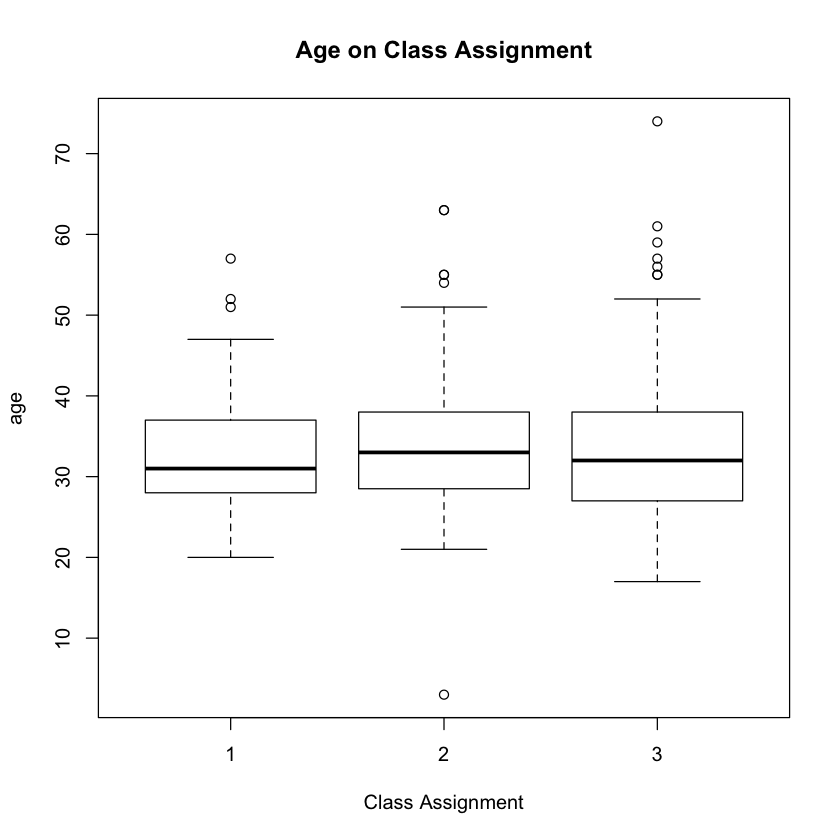

In [76]:
boxplot(age~predictions,data = inferenceFrame,ylab = "age",
        xlab = "Class Assignment",
        main = "Age on Class Assignment")

_Figure 1: Age on Class Assignment._

We see little relation between age of the worker and the class assignment.

In [262]:
#then recode gender (i.e. a social construct)
genderFrame = read.csv("../../data/preprocessed/genderCountFrame.csv")
colnames(genderFrame)[1] = "gender"
genderFrame$count = NULL
#merge the two datasets
inferenceFrame = merge(inferenceFrame,genderFrame,by = "gender")

In [263]:
inferenceFrame$gender = inferenceFrame$genderMap
inferenceFrame$genderMap = NULL

In [264]:
genderPredictTable = table(inferenceFrame$gender,inferenceFrame$predictions)
genderPredictTable

   
      1   2   3
  M 139 120 175
  O   4   4   5
  W  21  42  63

_Table 16: encoded gender on class assignment._

We see that

$$P(2 | M) = \frac{99}{146 + 99 + 163} = 24.26\%$$

and

$$P(2 | W) = \frac{47}{23 + 47 + 83} = 30.71\%.$$

These are pretty close together. We also see that

$$P(3 | M) = \frac{163}{146 + 99 + 163} \approx 40\%$$

and that

$$P(3 | W) = \frac{83}{23+47+83} = 54.24\%$$

This is a sizable effect to consider. In particular, it would suggest that women are more likely to feel poorly supported on mental health in the industry than men.

In [84]:
inferenceFrame$companySize[is.na(inferenceFrame$companySize)] = (
                            "Self-Employed")

In [85]:
table(inferenceFrame$companySize,inferenceFrame$predictions)

                
                  1  2  3
  1-5            12  1 17
  100-500        39 32 53
  26-100         47 34 62
  500-1000       12 14 15
  6-25           40 18 44
  More than 1000 23 49 59

_Table 17: company size on class assignment._

In [247]:
table(inferenceFrame$diagnosedWithMHD,inferenceFrame$predictions)

     
        1   2   3
  No   99  76 107
  Yes  65  90 136

We see that

$$P(2|No) = \frac{76}{99 + 76 + 107} = 26.95\%$$

and

$$P(2|Yes) = \frac{90}{65 + 90 + 136} = 30.93\%.$$

We also see that

$$P(3|No) \approx 37.94\%$$

and that

$$P(3|Yes) \approx 46.74\%$$

## Simple Modeling

**FIX: ADD More explanation here**

In [268]:
lowerBoundForm = "factor(predictions)~1"
#then make upperbound
upperBoundModVec = c()
#get all interaction levels available
for (gender in c(TRUE,FALSE)){
    for (isUSA in c(TRUE,FALSE)){
        for (companySize in c(TRUE,FALSE)){
            for (age in c(TRUE,FALSE)){
                for (diagnosedWithMHD in c(TRUE,FALSE)){
                    givenTermVec = c()
                    if (gender){
                        givenTermVec = c(givenTermVec,"factor(gender)")
                    }
                    if (companySize){
                        givenTermVec = c(givenTermVec,"factor(companySize)")
                    }
                    if (isUSA){
                        givenTermVec = c(givenTermVec,"factor(isUSA)")
                    }
                    if (age){
                        givenTermVec = c(givenTermVec,"age")
                    }
                    if (diagnosedWithMHD){
                        givenTermVec = c(givenTermVec,
                                         "factor(diagnosedWithMHD)")
                    }
                    #then paste these all
                    givenTerm = paste(givenTermVec,collapse = ":")
                    if (givenTerm != ""){
                        upperBoundModVec = c(upperBoundModVec,givenTerm)
                    }
                }
            }
        }
    }
}
#then get upper bound form
upperBoundForm = paste(upperBoundModVec,collapse = "+")
upperBoundForm = paste0("factor(predictions)~",upperBoundForm)

In [269]:
#then do stepwise regression for class 1
baseMod = multinom(lowerBoundForm,data = inferenceFrame)
upperMod = multinom(upperBoundForm,data = inferenceFrame)
finalClassMod.mc = step(baseMod,scope = list(lower = baseMod,upper = upperMod),
                   data = inferenceFrame,direction = "both")

# weights:  6 (2 variable)
initial  value 629.504841 
final  value 619.275518 
converged
# weights:  435 (288 variable)
initial  value 629.504841 
iter  10 value 579.776365
iter  20 value 567.664446
iter  30 value 562.636017
iter  40 value 558.092849
iter  50 value 552.069595
iter  60 value 543.376223
iter  70 value 536.584527
iter  80 value 529.878582
iter  90 value 525.395199
iter 100 value 518.984711
final  value 518.984711 
stopped after 100 iterations
Start:  AIC=1242.55
factor(predictions) ~ 1

trying + factor(gender) 
# weights:  12 (6 variable)
initial  value 629.504841 
iter  10 value 613.116732
final  value 613.116631 
converged
trying + factor(isUSA) 
# weights:  9 (4 variable)
initial  value 629.504841 
final  value 617.579880 
converged
trying + factor(companySize) 
# weights:  21 (12 variable)
initial  value 629.504841 
iter  10 value 610.900595
final  value 610.792067 
converged
trying + age 
# weights:  9 (4 variable)
initial  value 629.504841 
final  value 619.257779 


In [270]:
summary(finalClassMod.mc)$call$formula

factor(predictions) ~ factor(diagnosedWithMHD) + factor(gender)
<environment: 0x7fe6078f8c08>

_Figure 2: Our final model for the multinomial classifier._

We see that our model considers $isUSA$, $gender$, and $companySize$ for predicting our class assignment.

In [272]:
#try a decision tree
finalClassMod.tree = tree(factor(predictions) ~ factor(isUSA) + age +
                                        factor(gender) + factor(companySize)
                                          + factor(diagnosedWithMHD),
                                          data = inferenceFrame)

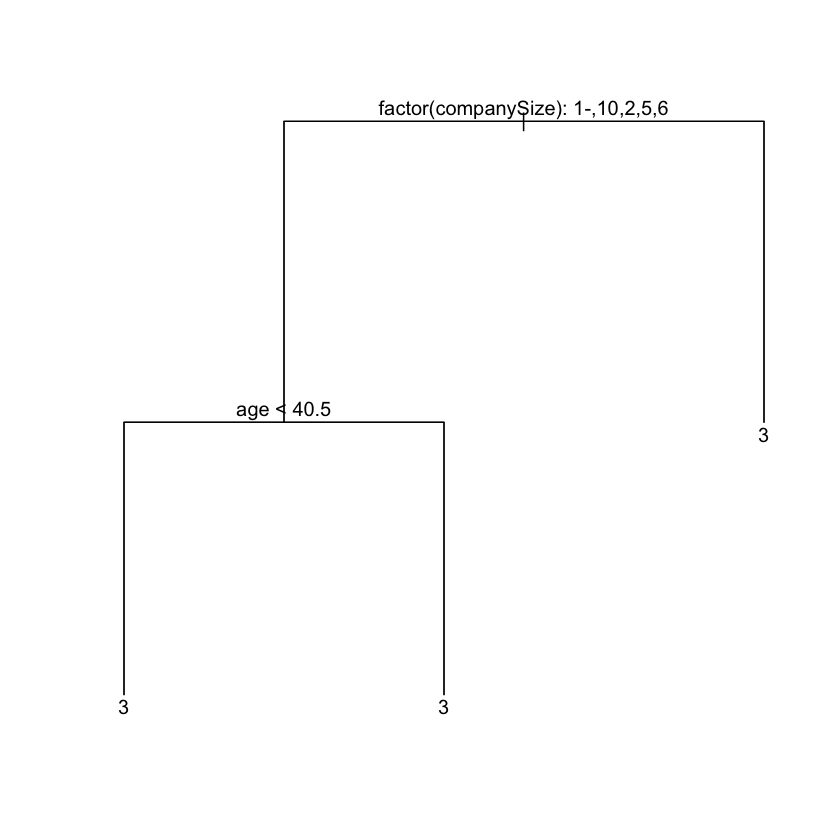

In [273]:
plot(finalClassMod.tree)
text(finalClassMod.tree,pretty = TRUE)

_Figure 3: Our final Decision Tree Model._

We see that our decision tree seems to never predict if an individual is assigned to class assignment 2. This is a strong suggestion that we have an imbalanced classes issue that our current decision tree is having issues picking up. Like our multinomial logistic regression, `gender`, `companySize`, but this swaps out consideration of `isUSA` to consider `age`.

In [274]:
#check predictions of both
mClassPredictions = predict(finalClassMod.mc)
treePredictions = predict(finalClassMod.tree,type = "class")
actualPredictions = inferenceFrame$predictions

In [275]:
#get accuracy
numAccurate.mc = length(
                actualPredictions[(actualPredictions == mClassPredictions)])
numAccurate.tree = length(
                actualPredictions[(actualPredictions == treePredictions)])
propAccurate.mc = numAccurate.mc / length(actualPredictions)
propAccurate.tree = numAccurate.tree / length(actualPredictions)
print(paste("The proportion accurate for the multinomial",
            "classifier is:",signif(propAccurate.mc,sigLev)))
print(paste("The proportion accurate for the decision tree is:",
            signif(propAccurate.tree,sigLev)))

[1] "The proportion accurate for the multinomial classifier is: 0.426"
[1] "The proportion accurate for the decision tree is: 0.424"


We are talking about an accuracy difference of less than $1\%$. They are both not amazing models, but the multinomial classifier at least will predict the class assignment of $2$ at particular points. Thus, I would argue that we should use the multinomial classifier for our class assignment.

In [276]:
finalClassMod = finalClassMod.mc
saveRDS(finalClassMod,"../../models/finalClusterAssignmentClassifier.rds")

## Inference and Preditions

As discussed before, our current model does a rather poor job at predicting the inference set. This is before we optimized for out-of-sample prediction.

In [277]:
inferenceFrame$classAssignment = inferenceFrame$predictions
inferenceFrame$predictedAssignment = predict(finalClassMod)

In [278]:
#let's make our confusion matrix
confusionMat = matrix(0,nrow = 3,ncol = 3)
for (i in 1:3){
    for (j in 1:3){
        levFrame = inferenceFrame[(inferenceFrame$predictedAssignment == i
                                 & inferenceFrame$classAssignment == j),]
        numAtLev = dim(levFrame)[1]
        confusionMat[i,j] = numAtLev
    }
}
#then name columns and rows
rownames(confusionMat) = c("Predict 1","Predict 2","Predict 3")
colnames(confusionMat) = c("Actual 1","Actual 2","Actual 3")
confusionMat

,Actual 1,Actual 2,Actual 3
Predict 1,90,59,89
Predict 2,0,0,0
Predict 3,74,107,154


_Table 17: Our Confusion Matrix for our Final Model._

We see by our confusion matrix that

$$P(Correct | Actual(1)) = \frac{65}{65 + 13 + 95} \approx 37.57\%,$$

$$P(Correct | Actual(2)) = 0%,$$

and

$$P(Correct | Actual(3)) = \frac{164}{54 + 32 + 164} \approx 65.6\%.$$

Thus, we can see that our model is doing a pretty good job at predicting people in class assignment 3, but generally not doing a great job at predicting classes $1$ and $2$. This is rather expected